
# 🎬 Netflix Data Analysis — Week 4 (Labmentix)
**Author:** Gouri  
**Date:** 2025-11-02  
**Dataset expected:** `netflix_titles.csv` (place it in the same folder as this notebook)

---

### Objective
Perform exploratory data analysis (EDA) on Netflix titles to understand content distribution, release trends, popular genres, and build a simple model (if applicable) to demonstrate basic machine learning workflow.


In [7]:

# 1) Imports & load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

pd.set_option('display.max_columns', None)

df = pd.read_csv('netflix_titles.csv')
print('Loaded shape:', df.shape)
df.head()


Loaded shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:

# 2) Quick overview
print('Columns:', df.columns.tolist())
print('\nMissing values per column:\n', df.isnull().sum())
df.info()
df.describe(include='all').T


Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Missing values per column:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-nu

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:

# 3) Cleaning & Feature Engineering
df.columns = [c.strip() for c in df.columns]
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip()

if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)
    df['year_added'] = df['date_added'].dt.year

if 'duration' in df.columns:
    df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

print('Value counts for type:')
print(df['type'].value_counts())
df.head(3)


<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sunil\AppData\Local\Temp\ipykernel_26328\1617179862.py:11: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
C:\Users\sunil\AppData\Local\Temp\ipykernel_26328\1617179862.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)


Value counts for type:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90.0
1,s2,TV Show,Blood & Water,nan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",nan,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,1.0


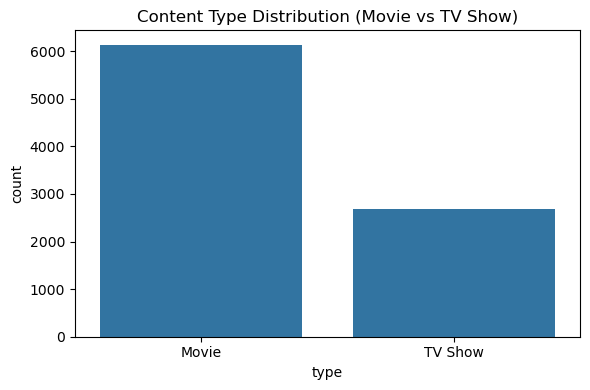

C:\Users\sunil\AppData\Local\Temp\ipykernel_26328\3001682187.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='viridis')


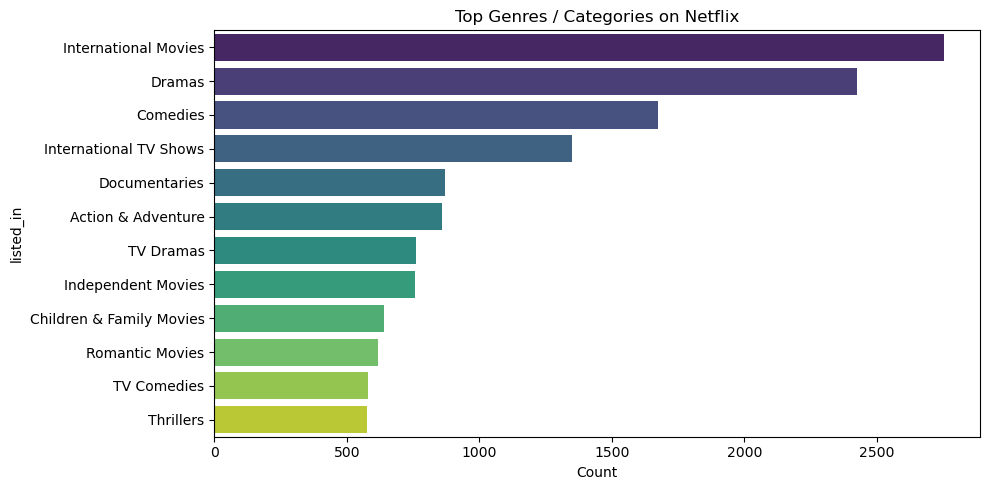

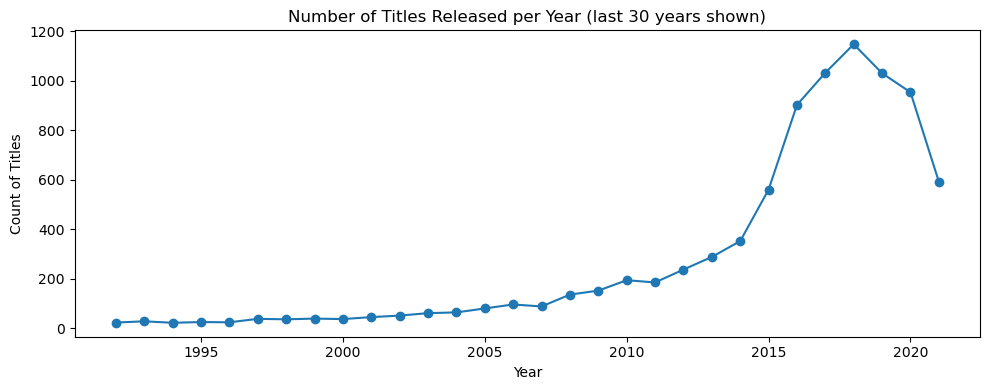

In [10]:

# 4) EDA Visuals
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Content Type Distribution (Movie vs TV Show)')
plt.tight_layout()
plt.show()

df['listed_in'] = df['listed_in'].fillna('Unknown')
genres = df['listed_in'].str.split(',').explode().str.strip().value_counts().head(12)
plt.figure(figsize=(10,5))
sns.barplot(x=genres.values, y=genres.index, palette='viridis')
plt.title('Top Genres / Categories on Netflix')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

if 'release_year' in df.columns:
    plt.figure(figsize=(10,4))
    df['release_year'].value_counts().sort_index().tail(30).plot(kind='line', marker='o')
    plt.title('Number of Titles Released per Year (last 30 years shown)')
    plt.xlabel('Year')
    plt.ylabel('Count of Titles')
    plt.tight_layout()
    plt.show()


C:\Users\sunil\AppData\Local\Temp\ipykernel_26328\86101649.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


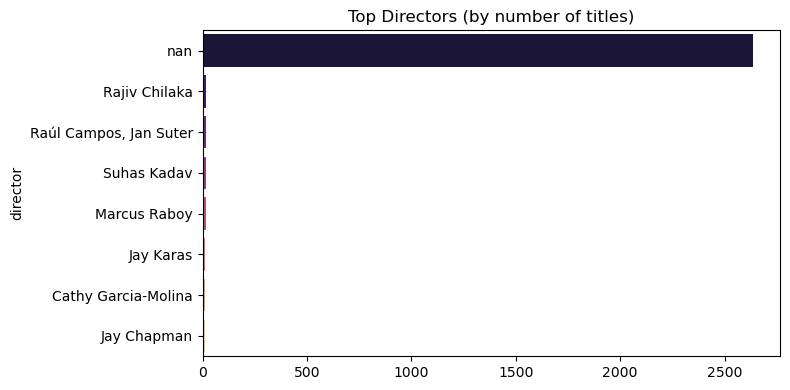

C:\Users\sunil\AppData\Local\Temp\ipykernel_26328\86101649.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


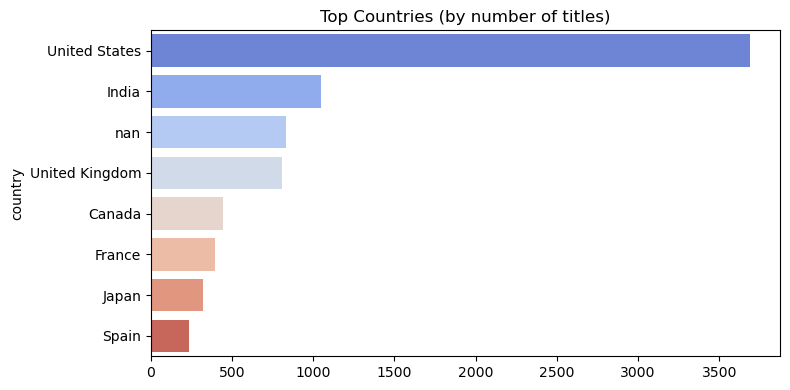

In [11]:

# 5) Popular directors and countries
top_directors = df['director'].fillna('Unknown').value_counts().head(8)
plt.figure(figsize=(8,4))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top Directors (by number of titles)')
plt.tight_layout()
plt.show()

top_countries = df['country'].fillna('Unknown').str.split(',').explode().str.strip().value_counts().head(8)
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top Countries (by number of titles)')
plt.tight_layout()
plt.show()


In [12]:

# 6) Simple ML example (if enough features exist)
model_df = df.copy()
features = []
if 'duration_num' in model_df.columns:
    features.append('duration_num')
if 'year_added' in model_df.columns:
    features.append('year_added')

if len(features) >= 1:
    model_df = model_df.dropna(subset=features + ['type'])
    model_df['type_label'] = (model_df['type']=='TV Show').astype(int)
    X = model_df[features]
    y = model_df['type_label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=42, max_depth=6)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Features used:', features)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('\nClassification report:\n', classification_report(y_test, y_pred))
else:
    print('Not enough numeric features for ML example.')


Features used: ['duration_num', 'year_added']
Accuracy: 0.9977259806708357

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1220
           1       0.99      1.00      1.00       539

    accuracy                           1.00      1759
   macro avg       1.00      1.00      1.00      1759
weighted avg       1.00      1.00      1.00      1759




## 🧠 Insights & Conclusion

- Netflix has a diverse catalog with both movies and TV shows; genre analysis highlights top categories such as Drama, International, and Documentaries (exact top genres may vary).  
- Release trends show increasing production in recent years for many regions.  
- Country and director distributions reveal concentration in certain geographies and creators.  
- Simple ML models can demonstrate basic classification (e.g., Movie vs TV Show) using duration and added-year as features — useful as a demo for model-building workflow.

**Next steps / Improvements:**  
1. Text analysis on descriptions to find themes and topics (NLP).  
2. Time-series forecasting of content additions per year.  
3. Recommendation system using collaborative filtering or content-based features.

---

### 🔗 LinkedIn Post (copy-paste ready)

🎯 **Week 4 Project — Netflix Data Analysis (Labmentix Internship)**

Completed a data-driven analysis of Netflix content focusing on catalog distribution, genre trends, and release patterns. Performed EDA, feature engineering, and a simple ML demonstration to classify content types. This project improved my data wrangling, visualization, and modeling skills using Python and Jupyter Notebook.

GitHub: (add your project link here)

#DataAnalytics #Python #MachineLearning #Netflix #EDA #JupyterNotebook #Labmentix #DataScience #GouriSunilKumar
